### EXO 1

In [1]:
import random
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
#ax.scatter 3 elements
import seaborn as sns

In [2]:
def terme_i (i, a) :
    c = 0
    for b in range (0, i) : 
        c = 65539 * a % 2**31
        a = c
    u = c/(2**31)
    return(u)

In [3]:
for i in range (0, 4) : 
    print("yes")

yes
yes
yes
yes


In [4]:
print(terme_i(150, 43))

0.25286796083673835


In [5]:
liste_vide = []
for i in range (0, 9000) : 
    liste_vide.append(terme_i(i, 65539))


In [6]:
to_plot = pd.DataFrame(liste_vide, columns = ['valeurs'])

In [7]:
to_plot.head()

,valeurs
0,0.000000
1,0.000183
2,0.000824
3,0.003296
4,0.012360


In [8]:
to_plot.shape

(9000, 1)

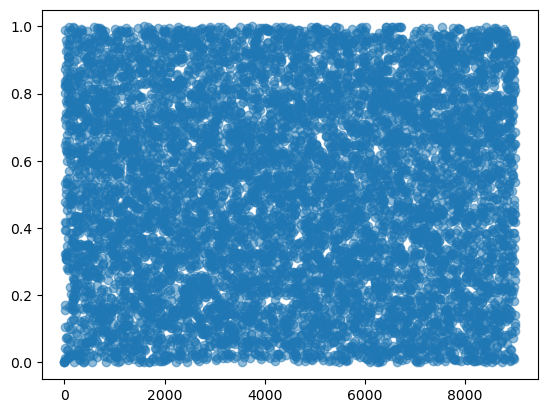

In [9]:
plt.scatter( to_plot.index, to_plot['valeurs'], alpha=0.5)

In [10]:
set_sup = set(to_plot.index[0.50 < to_plot['valeurs']].tolist())

In [11]:
set_inf = set(to_plot.index[to_plot['valeurs'] < 0.51].tolist())

In [12]:
liste_intersection = list(set_sup.intersection(set_inf))

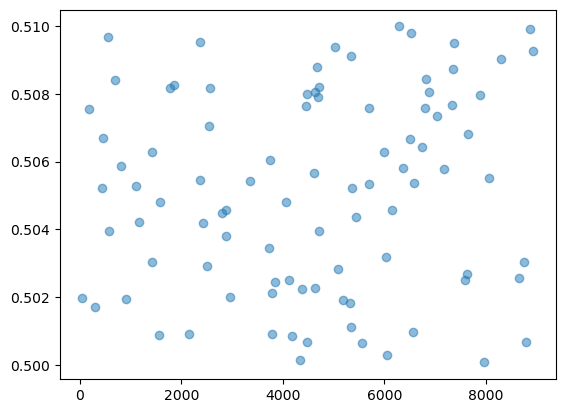

In [13]:
plt.scatter(to_plot.iloc[liste_intersection].index, to_plot.iloc[liste_intersection]['valeurs'], alpha=0.5)

In [14]:
for i in range (0,3) : 
    print(i)

0
1
2


In [15]:
liste_aux = []
for i in range (0, 9000) :
    if (i+1)%3 == 0 :
        liste_aux.append(i)
    elif i == 0 : 
        liste_aux.append(0)
    else : 
        continue

In [16]:

liste_index = []
for i in liste_aux :
    n = 1
    while n < 4 : 
        n+=1
        liste_index.append(i)


In [17]:
vraie_liste = liste_index[0:9000]

In [18]:
index_triple = pd.DataFrame(liste_index, columns = ['triple_ind'])

In [19]:
plot_randu = pd.concat([to_plot, index_triple], axis = 1)

In [20]:
plot_randu.head()

,valeurs,triple_ind
0,0.000000,0
1,0.000183,0
2,0.000824,0
3,0.003296,2
4,0.012360,2


In [21]:
plot_randu = plot_randu.reset_index()

In [22]:
plot_randu = plot_randu.drop(['index', 'triple_ind'], axis = 1)

In [23]:
test = []
for i in range (0,10) : 
    test.append(i)

In [24]:
for i in range (0,3) : 
    print(test[3*i])

0
3
6


In [25]:
u_1 = []
u_2 = []
u_3 = []
set_aux = []
for i in range (0,9000) :
        if i not in set_aux :
            u_1.append(liste_vide[i])
            u_2.append(liste_vide[i+1])
            u_3.append(liste_vide[i+2])
        else : 
            continue
        set_aux.append(i+2)
        set_aux.append(i)
        set_aux.append(i+1)   

In [26]:
u_1 = pd.DataFrame(u_1, columns = ['u_1'])
u_2 = pd.DataFrame(u_2, columns = ['u_2'])
u_3 = pd.DataFrame(u_3, columns = ['u_3'])

In [27]:
dernier_df = pd.concat([u_1, u_2, u_3], axis = 1)

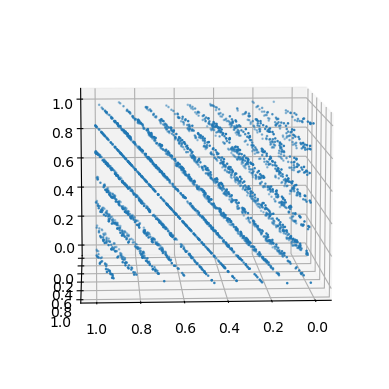

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(dernier_df['u_1'],dernier_df['u_3'],dernier_df['u_2'], s = 0.75)
ax.view_init(9, 87) 

### EXO2

In [29]:
sample_unif = np.random.uniform(0,1,10000)

In [30]:
def expo(i) : 
    x = -(np.log(1-i))
    return x 

In [31]:
expo_sample = []
for i in sample_unif : 
    expo_sample.append(expo(i))


In [32]:
expo_sample = pd.DataFrame(expo_sample, columns = ['valeurs'])

In [33]:
expo_sample

,valeurs
0,0.098625
1,0.463951
2,0.059456
3,0.093195
4,0.922052
...,...
9995,0.665289
9996,1.801628
9997,1.292342
9998,0.575313


(array([104., 104.,  98., 115.,  89.,  75.,  72.,  86.,  85.,  88., 110.,
         89.,  92.,  84.,  79.,  89.,  93.,  89.,  91.,  81.,  70.,  72.,
         84.,  71.,  81.,  75.,  69.,  76.,  73.,  85.,  71.,  75.,  78.,
         69.,  68.,  81.,  64.,  63.,  60.,  57.,  68.,  68.,  62.,  53.,
         54.,  64.,  57.,  62.,  59.,  68.,  55.,  52.,  70.,  62.,  57.,
         58.,  46.,  43.,  65.,  46.,  45.,  46.,  53.,  51.,  46.,  55.,
         53.,  41.,  51.,  44.,  53.,  57.,  44.,  52.,  51.,  45.,  45.,
         48.,  45.,  45.,  50.,  43.,  41.,  42.,  45.,  39.,  37.,  34.,
         35.,  44.,  35.,  33.,  43.,  28.,  29.,  46.,  38.,  36.,  45.,
         34.,  46.,  35.,  42.,  33.,  36.,  37.,  47.,  17.,  32.,  34.,
         38.,  38.,  38.,  22.,  30.,  25.,  32.,  29.,  37.,  24.,  33.,
         35.,  20.,  31.,  34.,  36.,  32.,  31.,  24.,  30.,  28.,  28.,
         23.,  28.,  26.,  21.,  29.,  24.,  26.,  25.,  34.,  22.,  26.,
         23.,  36.,  24.,  22.,  33., 

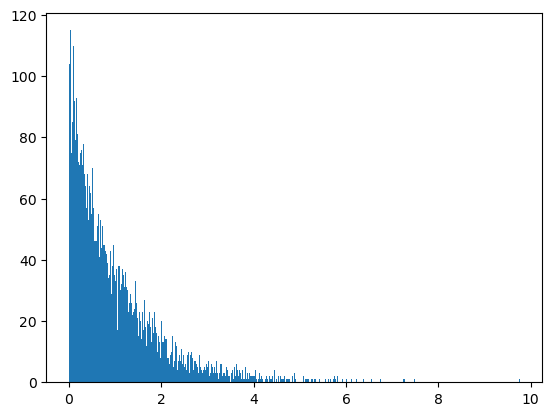

In [34]:
plt.hist(expo_sample, bins = 1000)

In [35]:
laplace_sample = np.random.uniform(0,1,10000)

In [36]:
def laplace_inv_inf(i) : 
    x = np.log(2*i)
    return x

In [37]:
def laplace_inv_sup(i) : 
    x = -(np.log(2*(1-i)))
    return x 

In [38]:
laplace_distrib = []
for i in laplace_sample : 
    if i >= 0.5 : 
       laplace_distrib.append(laplace_inv_sup(i))
    else : 
        laplace_distrib.append(laplace_inv_inf(i))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   0., 

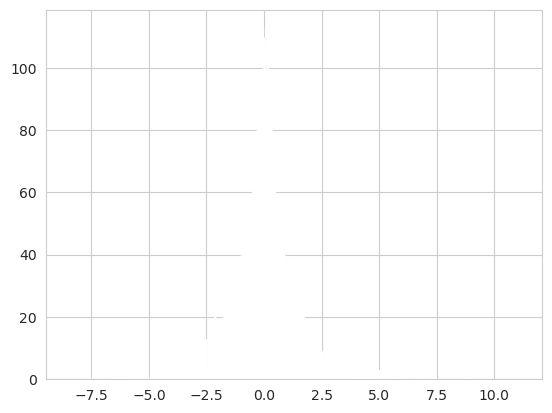

In [43]:
plt.hist(laplace_distrib, bins = 1000, color = 'blue')

/tmp/ipykernel_2653/3042201063.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(laplace_distrib), bw=0.5)


<Axes: ylabel='Density'>

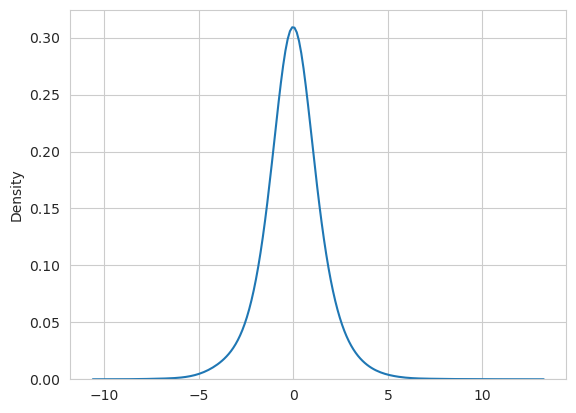

In [40]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(laplace_distrib), bw=0.5)

<Axes: ylabel='Frequency'>

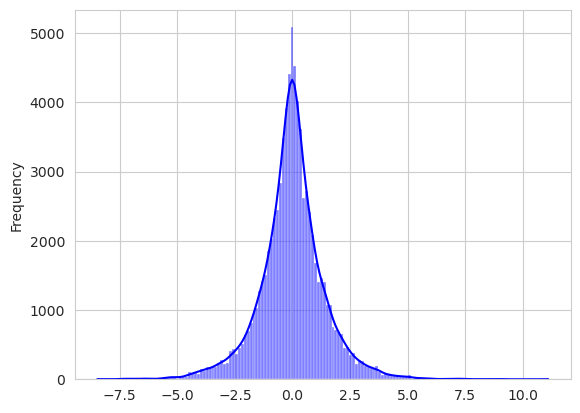

In [48]:
sns.histplot(data = laplace_distrib, stat = 'frequency', kde = 'True', color = 'blue')

#### Acceptation rejet

In [50]:
m = np.sqrt(2/np.pi)*np.exp(1/2)

In [53]:
def gaussian_ditrib(x) : 
    y = (1/np.sqrt(2*np.pi))*np.exp(-(x)**2/2)
    return y

In [55]:
unif_sample_gauss = np.random.uniform(0,1,10000)

In [56]:
def laplace(x) : 
    if x >= 0.5 : 
       y = laplace_inv_sup(x)
    else : 
        y = laplace_inv_inf(x)
    return y 

In [57]:
#donc la cell du dessus est un peu useless
#idee : prendre un echantillon a partir du laplace deja tire et chaque point ce sera un x et on voit si on accepte ou on rejette a partir de ca